In [3]:
!pip install matplotlib



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/7.6 MB ? eta -:--:--
                                              0.1/7.6 MB 1.3 MB/s eta 0:00:06
                                              0.1/7.6 MB 1.6 MB/s eta 0:00:05
     -                                        0.3/7.6 MB 2.0 MB/s eta 0:00:04
     --                                       0.5/7.6 MB 2.9 MB/s eta 0:00:03
     --                                       0.5/7.6 MB 2.9 MB/s eta 0:00:03
     ----                                     0.8/7.6 MB 3.0 MB/s eta 0:00:03
     ------                                   1.3/7.6 MB 3.9 MB/s eta 0:00:02
     --------                                 1.6/7.6 MB 4.5 MB/s eta 0:00:02
     -----------                              2.1/7.6 MB 5.0 MB/s eta 0:00:02
     ------------                             2.5/7.6 MB 5.2 MB/s eta 0:00:01
     --------------                           2.7/7.6 MB 5.6 MB/s eta 0:00:01
     ---------------                          3.0/7.6 MB 5.4 MB/s eta 0

In [4]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing,tree
from matplotlib import pyplot as plt 

In [6]:
#load the dataset
df = pd.read_csv('weather.csv')
df.head()

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes


In [7]:
#drop the unwanted attributes anfd define target variable
Attr = df.drop(['play'],axis = 'columns')
Target = df['play']

In [9]:
Attr.head()


,outlook,temperature,humidity,windy
0,overcast,hot,high,False
1,overcast,cool,normal,True
2,overcast,mild,high,True
3,overcast,hot,normal,False
4,rainy,mild,high,False


In [10]:
Target

0     yes
1     yes
2     yes
3     yes
4     yes
5     yes
6      no
7     yes
8      no
9      no
10     no
11     no
12    yes
13    yes
Name: play, dtype: object

In [11]:
new_attr = Attr.select_dtypes(include=['object'])
new_attr

,outlook,temperature,humidity
0,overcast,hot,high
1,overcast,cool,normal
2,overcast,mild,high
3,overcast,hot,normal
4,rainy,mild,high
5,rainy,cool,normal
6,rainy,cool,normal
7,rainy,mild,normal
8,rainy,mild,high
9,sunny,hot,high


In [17]:
#conversion of nominal to numeric
label_encoder = preprocessing.LabelEncoder()
for columns in new_attr : 
    new_attr[columns] = label_encoder.fit_transform(Attr[columns])
    
new_attr


,outlook,temperature,humidity
0,0,1,0
1,0,0,1
2,0,2,0
3,0,1,1
4,1,2,0
5,1,0,1
6,1,0,1
7,1,2,1
8,1,2,0
9,2,1,0


In [21]:
#convert target to numeric data
Target.unique()

array(['yes', 'no'], dtype=object)

In [23]:
Target.replace({'no':0,'yes':1},inplace=True)
Target

0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    1
13    1
Name: play, dtype: int64

In [26]:
model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(new_attr,Target)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [27]:
fig=plt.figure(figsize=(25,20))

<Figure size 2500x2000 with 0 Axes>

[Text(0.375, 0.875, 'x[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.375, 'x[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.125, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.375, 'x[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.625, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]')]

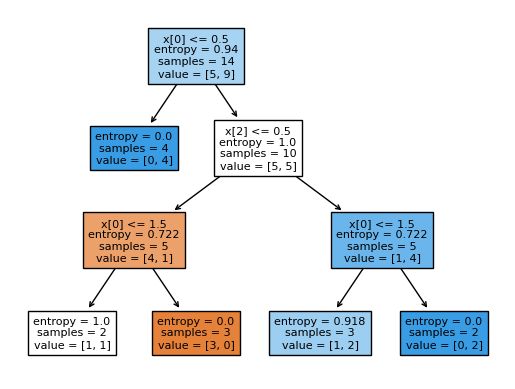

In [28]:
tree.plot_tree(model, filled=True, fontsize=8)